In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

## Generate some data

In [16]:
errors = np.random.normal(0, 1, 400)

In [17]:
# 약 4개월 정도 기간에 해당하는 데이터 생성
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [18]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [19]:
# 생성한 데이터를 pandas Series 형태로 변경 + make it infer the frequency
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

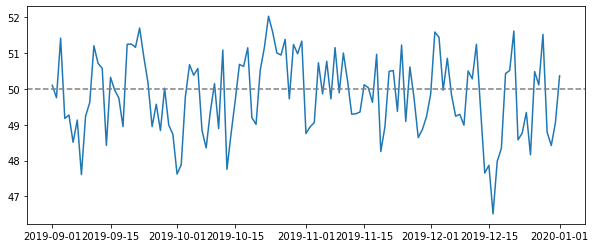

In [20]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey')

In [21]:
def calc_corr(series, lag):
    return pearsonr(series[:-lag], series[lag:])[0]

## ACF

<BarContainer object of 10 artists>

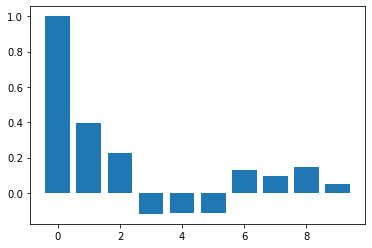

In [22]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags])

## PACF

<BarContainer object of 20 artists>

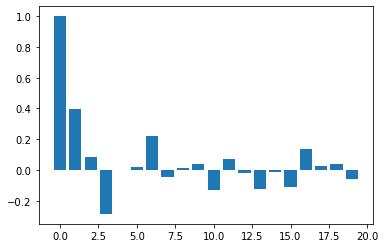

In [39]:
pacf_vals = pacf(series)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

## Get training and testing sets

In [24]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

## Fit ARIMA Model

In [28]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [29]:
#fit the model
model_fit = model.fit()

In [30]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -170.800
Date:                Mon, 17 Jul 2023   AIC                            349.599
Time:                        06:13:16   BIC                            360.783
Sample:                    09-01-2019   HQIC                           354.141
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8141      0.160    310.789      0.000      49.500      50.128
ma.L1          0.3613      0.089      4.057      0.000       0.187       0.536
ma.L2          0.3563      0.089      3.989      0.0

## Predicted model

In [40]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [41]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [42]:
residuals = test_data - predictions

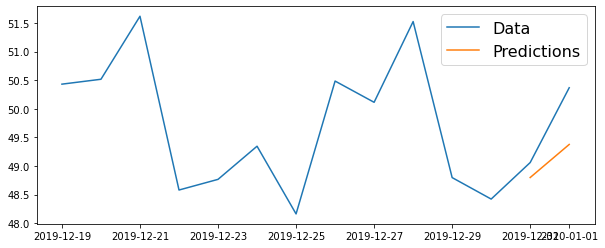

In [43]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

In [44]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0125


In [45]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.7253379814970377
